In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import viz_kmeans

from pydataset import data

np.set_printoptions(suppress=True)

## Introduction: K-Means clustering algorithm
- Unsupervised Algorithm
    - we are making an infrenece about the data without any labels
    - no target here because it is unsupervised
- Search for a pre-determined number of clusters within an unlabeled dataset
    - we might choose certain attributes and use tools to come up wiht a certain number of clusters
        - different ways to choose # of clusters
- k = number of clusters (user specified)
    - a hyper parameter in this model
        - we need to tell it before hand look for k number of clusters
- Distance based
    - trying to calculate distane between features we have
        - in values not in meters/kilometes/ect.
            - if in the same group they are very similar, different group they are pretty different

## How K-means algorithm works:
- How it finds out what the clusteers are.
 
- How many clusters do you see here?
    - 4
- How can the algorithm go in there look at all the points and come to the same conclusion
    - The process is it starts with:
        1. Initialize number of clusters
        2. Find the distance of data point to centroid
            - Some may be sloser to one than the other
                - They would be put intothe cluster that are closest too.
            - Specifiy which centroid each data point belongs too
        3. Re-calculate the centroid again
            - Usally by mean of the data points
        4. Reassign these points to the centroids again
            - Because their position to the centroids may change after they are moved
        5. Repeat until the centroids dont move anymore
            - Now you have your offical clusters

Step 1: Randomly choose k starting centers

Step 2: **Cluster Assignment**:
Assign each observation to nearest Center (based on distance). Observations assigned to a center are part of a cluster.

Step 3: **Move Centeroids**:
Recalculate new centroids location (mean of observations within a cluster).

Step 4+: Keep repeating step 2 and 3 until centers do not move.

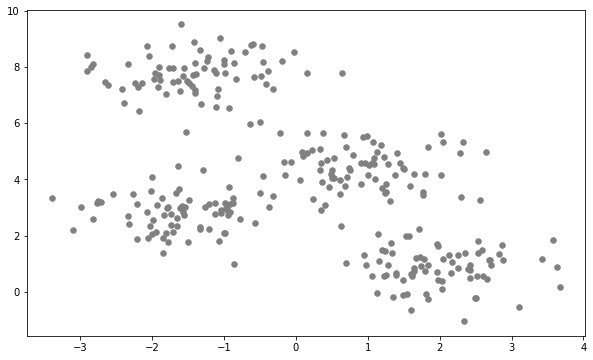

In [2]:
# visualize some data 
viz_kmeans.make_blob()



Visualization:
K-means visuals (Slideshow): 
https://docs.google.com/presentation/d/1NtMLd4fp2pi_bDJiIg2O-5g48xJiXjtYFad42B6Pj6Q/edit?usp=sharing

Animation (Thanks Zach!): https://stats-demos.zach.wiki/static/kmeans_clustering.mp4

## Sklearn implementation

In [3]:
from sklearn.cluster import KMeans

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

# if we have all this data minus the species column can we use cluster model to find how many species there are?

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
# define independent variables for k-means

X = iris[['petal_length', 'sepal_length']]
X.head(3)

# up to you on what to find clusters on it is your choice

,petal_length,sepal_length
1,1.4,5.1
2,1.4,4.9
3,1.3,4.7


In [6]:
# Scale the X

from sklearn.preprocessing import StandardScaler
# since it is distance based it is always helpful to scale the data


scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
X_scaled.head()

,petal_length,sepal_length
1,-1.340227,-0.900681
2,-1.340227,-1.143017
3,-1.397064,-1.385353
4,-1.283389,-1.506521
5,-1.340227,-1.021849


In [8]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

In [9]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)


X_scaled['cluster'] = kmeans.predict(X_scaled)

iris.head()
# added a cluster number column

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,2
2,4.9,3.0,1.4,0.2,setosa,2
3,4.7,3.2,1.3,0.2,setosa,2
4,4.6,3.1,1.5,0.2,setosa,2
5,5.0,3.6,1.4,0.2,setosa,2


In [10]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)
# so now we have lables

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
54,5.5,2.3,4.0,1.3,versicolor,0
132,7.9,3.8,6.4,2.0,virginica,1
20,5.1,3.8,1.5,0.3,setosa,2
93,5.8,2.6,4.0,1.2,versicolor,0
126,7.2,3.2,6.0,1.8,virginica,1
11,5.4,3.7,1.5,0.2,setosa,2
79,6.0,2.9,4.5,1.5,versicolor,0
141,6.7,3.1,5.6,2.4,virginica,1
24,5.1,3.3,1.7,0.5,setosa,2
32,5.4,3.4,1.5,0.4,setosa,2


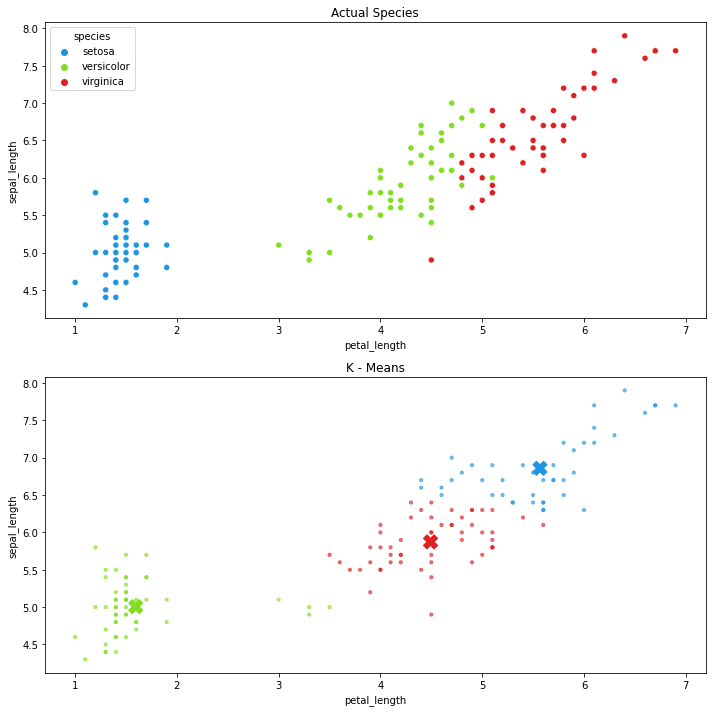

In [11]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

## Attirbutes for Kmeans :
- **cluster_centers_**: 
    - The center point of each cluster (aka centeroids).

- **labels_**: 
    - The labels for each observation.

- **intertia_**: 
    - Sum of squared distances of samples to their closest cluster center.

In [12]:
# Cluster Centers aka centroids
# The ouput is scaled!!
    # make sure to keep that in mind
    # either use use scaled axis and centorids or 
        # unscaled axis and centorids
             # NEVER A MIX OF BOTH!!!

kmeans.cluster_centers_
# also called centroids
    # can be used interchangably



array([[ 0.41744409,  0.03665519],
       [ 1.02844019,  1.22961906],
       [-1.22865676, -1.01511749]])

In [13]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled



,petal_length,sepal_length
0,0.417444,0.036655
1,1.028440,1.229619
2,-1.228657,-1.015117


In [14]:
# Centriods for unscaled data?
# remember the centroids are just the mean of all the points
centroids = iris.groupby('cluster')['petal_length', 'sepal_length'].mean()
centroids

,petal_length,sepal_length
cluster,,
0,4.492453,5.873585
1,5.567442,6.858140
2,1.596296,5.005556


In [15]:
# Another way
# use inverse scaler to get cluster centers in original unscaled units

scaler.inverse_transform(kmeans.cluster_centers_)
# theya re the same as centroid for unscaled

array([[4.49245283, 5.87358491],
       [5.56744186, 6.85813953],
       [1.5962963 , 5.00555556]])

In [16]:
# Labels (same as from predict)
kmeans.labels_
# give lables for each observation

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

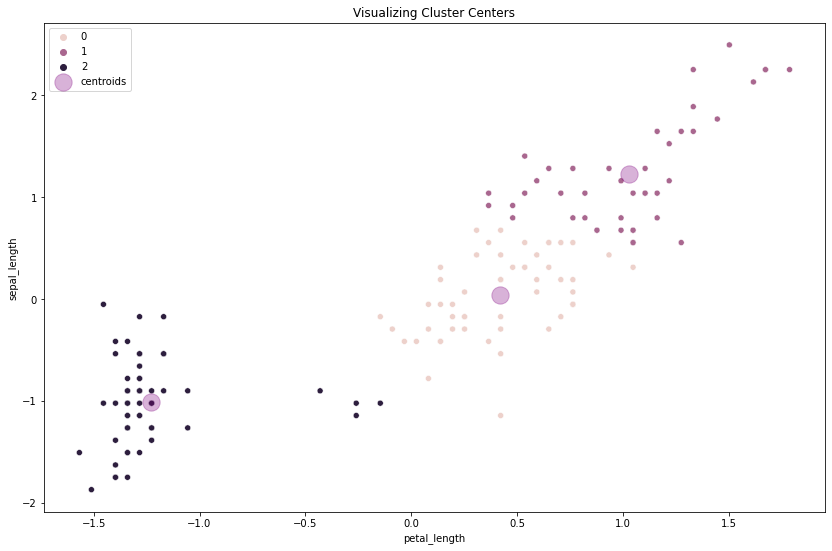

In [17]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_length', y='sepal_length', data= X_scaled, hue='cluster')


# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x='petal_length', y='sepal_length', ax=plt.gca(), color='purple', alpha=0.3, s=300, marker='o', label='centroids')
    # ax=plt.gca() puts the centroids onto the scatterplot
plt.title('Visualizing Cluster Centers')
plt.legend();

In [18]:
# we dont want a number on cluster anymore
iris['cluster'] = 'cluster' + iris.cluster.astype(str)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster2
2,4.9,3.0,1.4,0.2,setosa,cluster2
3,4.7,3.2,1.3,0.2,setosa,cluster2
4,4.6,3.1,1.5,0.2,setosa,cluster2
5,5.0,3.6,1.4,0.2,setosa,cluster2


<Figure size 1008x648 with 0 Axes>

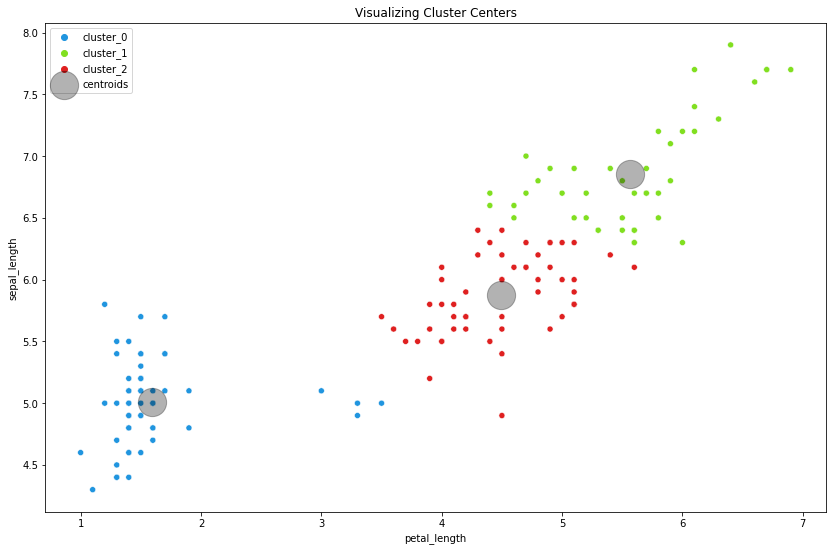

In [34]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = iris, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_length', y = 'sepal_length', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [20]:
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

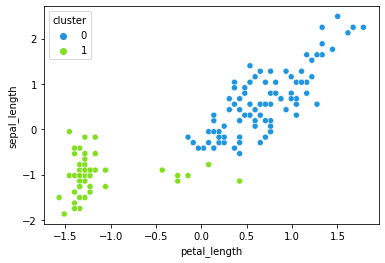

In [21]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_length', y='sepal_length', data = X_scaled, hue = 'cluster')

## How to choose 'k'

#### A *prior* knowledge about application domain/educated guess
- How many five different types of bacteria in the world (k = 5)
- There are two different kinds of people in world (k = 2)
S
#### earch for a 'good' k value
- Try different k values and evaluate results
    - Inertia = sum of squared distances from each point to it's assigned centroid
        - the measur eof how far your data is from each centoroid
            - high inercia = very spread out
            - low inercia = not very spread out
        - do you like low or high?
            - may this will effect how you test this out
    - minimize inertia(?)
        - can be helpful but not always
    - Use elbow method (using inertia) to choose k

In [22]:
kmeans.inertia_

84.72073862193372

In [23]:
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

84.72073862193372

In [31]:
k = 3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

# will get lower the higher the k

43.034691996034674

In [32]:
k = 4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

28.486372225447568

In [33]:
k = 5 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

22.395986080151957

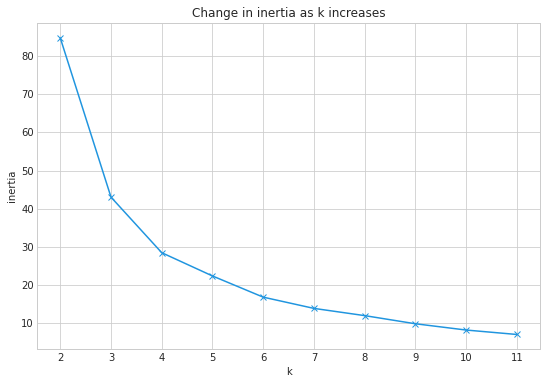

In [24]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
# x axis is how many cluster you can have
# y axis is the inercia

# whe I went from k from 2 to 3 there was a steep drop in inercia
    # the inercia curve flattens out more and more the highter amoun of cluster you have
# there is no hard and fast rul on which to choose
    # this is just a guidence

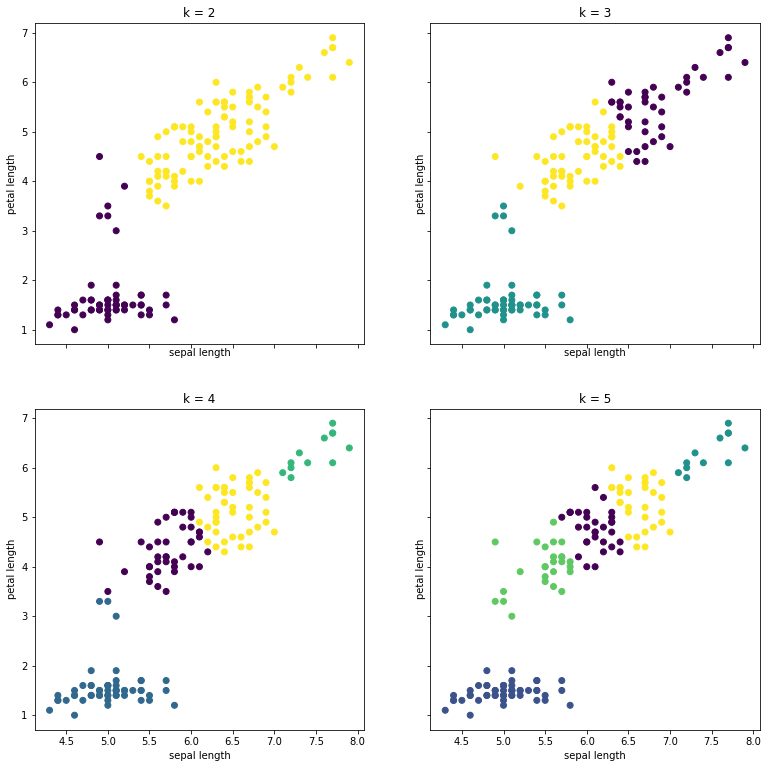

In [25]:
# What value of k is appropriate?
# visualize and decide

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

In [26]:
# Useful functions I used:


def create_cluster(train, X, k):
    # takes in train, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 539)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    train['cluster'] = kmeans.predict(X_scaled)
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return train, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,train,kmeans, X_scaled, scaler):
    # takes in x and y (variable names as strings, along with returned objects from previous
    # fuction create_cluster and creates a plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = train, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

In [27]:
iris, X_scaled, scaler, kmeans, centroids = create_cluster(iris, X, 3)

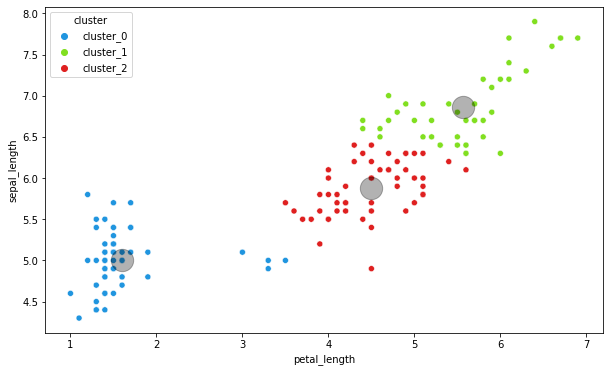

In [28]:
create_scatter_plot('petal_length','sepal_length',iris,kmeans, X_scaled, scaler)

# K-Means
In this lesson we'll learn about the K-Means clustering algorithm.

## K-Means Overview
### At A Glance
- Unsupervised machine learning algorithm
- Groups a dataset into a user-specified number (k) of clusters
- k must be specified ahead of time
- clusters won't have the same number of points

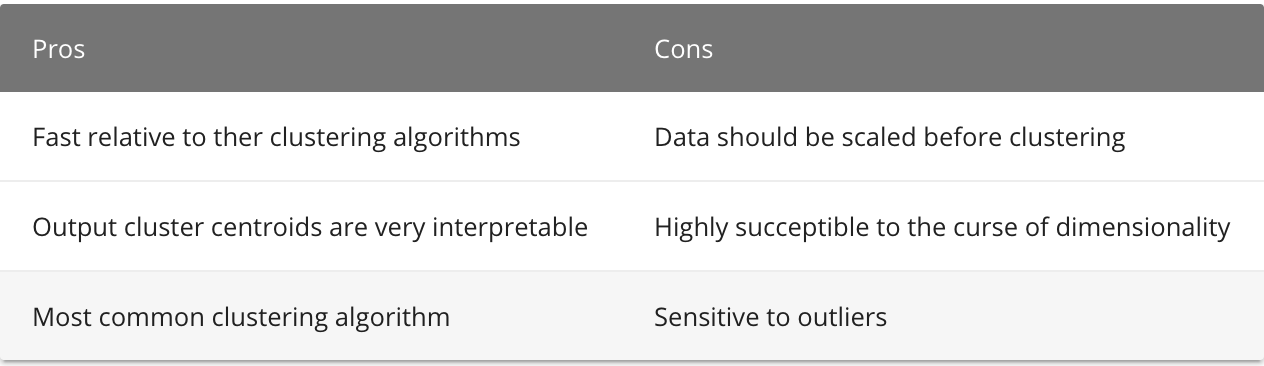

## Algorithm
1. Start with our data: X.
2. Randomly1 choose k points in the same space as X. These are called the centroids.
3. Calculate the distance from every point in X to each of the centroids.
4. Assign each point in X to the closest centroid.
5. eposition the centroids such that they are the average of all the points assigned to them.
6. Repeat from step 3 until some condition for stopping2 is met.

## Vocabulary
- **centroid:**
    - one of the cluster centers in a K-Means clustering
- **inertia:** 
    - sum of the squared distances from each point to it's assigned centroid

## Example with Iris
To demonstrate k-means clustering, we'll use the iris dataset. This dataset is particularly useful for demonstrating clustering algorithms because we know ahead of time there should be 3 clusters, for each of the distinct 3 species.

In [29]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import acquire
import viz
np.random.seed(4)

iris = acquire.get_iris_data()

ModuleNotFoundError: No module named 'acquire'

In [ ]:
iris.head()

We'll pretend that we don't know the species name and species id ahead of time. And, for the sake of simplicity, we'll just use two fields from the dataset.



In [ ]:
X = iris[['petal_length', 'sepal_length']]

Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

The numbers output here are the groups that our K-means algorithm predicted each row to be in. Let's go ahead and store the predicted cluster back into our original dataframe.

In [ ]:
iris['cluster'] = kmeans.predict(X)

Let's visualize what our clusters look like:

In [ ]:
viz.clustering_example1(iris)

## The kmeans Object
The K-means object also has a few interesting properties:
- `cluster_centers_`: 
    - The center point of each cluster.

- `labels_`: 
    - The labels for each observation.

This is the same as what we obtained from `kmeans.predict(X)` above. The difference is that the `predict` method can be used on unseen data (for example, your test or validate data splits), while the `labels_` property only contains clusters for the data used for fitting.

- `intertia_`: 
    - The sum of the squared errors from each data point to it's associated cluster.

Let's take a closer look at the cluster centers.

## Cluster Centers

In [ ]:
kmeans.cluster_centers_

These are the average values of each feature for each cluster. Putting them into a dataframe and labelling them will help illustrate:

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

Note that because of the way that the k-means algorithm works, these are the same numbers we would get from grouping by the cluster number and finding the average values for those features.

In [ ]:
iris.groupby('cluster')['petal_length', 'sepal_length'].mean()

Keep in mind these cluster centers are not data points from the dataset itself; they are the calculated average value for each group.

Let's visualize the cluster centers on top of our data too:

In [ ]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

## Exploring Different Values of k
Let's see what happens when we use a number of clusters that is less than optimal.

First we'll see what happens with 2 clusters:

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)

sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

And now let's see what happens when we use a larger number.

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

## Choosing k with Inertia
Within the context of k-means clustering, inertia is the sum of squared distances from each point to it's assigned centroid. We can use this quantity to help us determine a good value for k.

We cannot simply choose a number of clusters that minimizes inertia, because inertia will always decrease as we increase the number of clusters. Consider the case where the number of clusters is equal to the number of data points: the inertia will be 0, but our clusters don't provide any value.

One way to choose the ideal number of clusters using inertia is the **elbow** method. To use the elbow method, we'll visualize the inertia against our choice in number of clusters. In this visualization, we'll look for the "elbow" of the curve, or the point where adding additional clusters doesn't give us as big of a reduction in inertia.

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In the chart above, we notice that the reduction in inertia drops off after about 4 clusters. Based on the above visualization, we might conclude that the optimal number of clusters is 4.

In addition to the elbow method, it is always helpful to visualize our clusters.

A common way to do this is to use color to indicate which cluster each data point is in.3

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')


We'll note several things in the above visualizations (pretending we don't know the "correct" answer that k should be 3):

- It looks like there are 2 main groups in the plot, so k = 2 could be a reasonable choice.
- When k = 2 or k = 3, there are several points that look like they should be in the bottom left cluster that aren't.
- When k = 4, the bottom left cluster is fully seperated.
- It doesn't look like a k of 5 is much more useful than a k of 4.

Based on these observations, and the elbow method visualization above, we might decide to use 4 clusters.



## Further Reading

- https://en.wikipedia.org/wiki/Elbow_method_(clustering)
- https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set
- https://scikit-learn.org/stable/modules/clustering.html#k-means